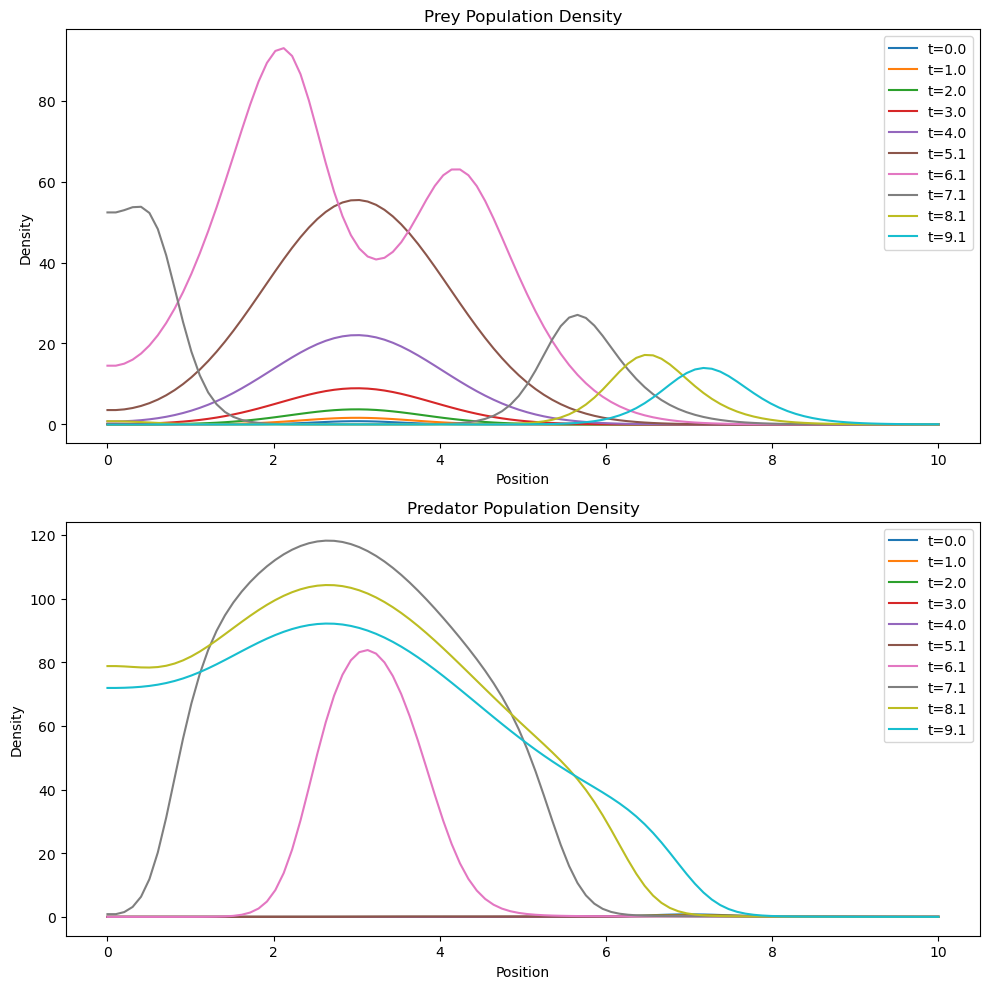

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Spatial domain
L = 10.0       # Length of the spatial domain
Nx = 100       # Number of spatial points
x = np.linspace(0, L, Nx)

# Initial parameters for prey and predator
u0_peak = 1.0  # Peak density of prey
v0_peak = 1.0  # Peak density of predator
x_u = 3.0      # Initial position of prey
x_v = 7.0      # Initial position of predator
sigma_u = 0.5  # Standard deviation of prey
sigma_v = 0.5  # Standard deviation of predator

# Normalized Gaussian initial conditions, main change is normalisation facor of gaussian normalisation.
u0 = (u0_peak / (sigma_u * np.sqrt(2 * np.pi))) * np.exp(-((x - x_u)**2) / (2 * sigma_u**2))
v0 = (v0_peak / (sigma_v * np.sqrt(2 * np.pi))) * np.exp(-((x - x_v)**2) / (2 * sigma_v**2))

# Reaction-diffusion parameters
D_u = 0.1  # Diffusion coefficient for prey
D_v = 0.1  # Diffusion coefficient for predator
a = 1.0    # Growth rate of prey
b = 0.1    # Death rate of prey due to predation
c = 0.1    # Death rate of predator in the absence of prey
d = 0.1    # Reproduction rate of predator per prey eaten

# Discretize the spatial domain
dx = x[1] - x[0]

# Define the reaction-diffusion equations
def reaction_diffusion(t, U):
    u, v = U[:Nx], U[Nx:]
    
    # Diffusion terms
    dudx2 = np.zeros_like(u)
    dvdx2 = np.zeros_like(v)
    dudx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    dvdx2[1:-1] = (v[2:] - 2*v[1:-1] + v[:-2]) / dx**2
    
    # Neumann boundary conditions (zero flux at boundaries)
    dudx2[0] = dudx2[1]
    dudx2[-1] = dudx2[-2]
    dvdx2[0] = dvdx2[1]
    dvdx2[-1] = dvdx2[-2]
    
    # Reaction terms
    du = a * u - b * u * v + D_u * dudx2
    dv = d * u * v - c * v + D_v * dvdx2
    
    return np.concatenate([du, dv])

# Initial conditions vector
U0 = np.concatenate([u0, v0])

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the PDE using an ODE solver
sol = solve_ivp(reaction_diffusion, t_span, U0, t_eval=t_eval, method='RK45')

# Extract the solutions
u_sol = sol.y[:Nx, :]
v_sol = sol.y[Nx:, :]

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

for i in range(len(t_eval)):
    if i % 10 == 0:  # Plot every 10th time step for clarity
        axs[0].plot(x, u_sol[:, i], label=f't={t_eval[i]:.1f}')
        axs[1].plot(x, v_sol[:, i], label=f't={t_eval[i]:.1f}')

axs[0].set_title('Prey Population Density')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Density')
axs[0].legend()

axs[1].set_title('Predator Population Density')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()

